In [7]:
import sys
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(str(Path().resolve().parent))
from scripts.pref_generator import generate_preferences
from paths import SCHEDULES, ASSIGNMENTS

In [8]:
PLAN_PATH  = SCHEDULES / "single_subject_x2.csv" 
ASSIGN_PATH = ASSIGNMENTS / "single_subject_x2.csv"
TIME_FMT   = "%H:%M" 

In [9]:
plan = pd.read_csv(PLAN_PATH, sep=None, engine='python')
plan_2 = plan[['subject', 'group_id', 'day', 'start_time']].copy()
assign = pd.read_csv(ASSIGN_PATH, sep=None, engine='python')

In [10]:
def plot_prefrences(plan, prefs):
    merged = prefs.merge(plan, on=['subject', 'group_id'], how='left')

    merged['minute'] = pd.to_datetime(merged['start_time'], format=TIME_FMT).dt.hour*60 + \
                    pd.to_datetime(merged['start_time'], format=TIME_FMT).dt.minute
        
    days_order = ['Pn', 'Wt', 'Sr', 'Cz', 'Pt']
    unique_minutes = sorted(merged['minute'].unique())

    heat = np.zeros((len(days_order), len(unique_minutes)), dtype=int)

    for (_, _stu, _subj, _gid, pref, day, _t, minute) in merged.itertuples():
        if day in days_order:
            d_idx = days_order.index(day)
            t_idx = unique_minutes.index(minute)
            heat[d_idx, t_idx] += pref

    fig, ax = plt.subplots(figsize=(10, 6))
    im = ax.imshow(heat.T, aspect='auto', origin='lower')

    # osie
    ax.set_xticks(range(len(days_order)))
    ax.set_xticklabels(days_order)

    def minute_to_str(m):
        h, mi = divmod(m, 60)
        return f"{h:02d}:{mi:02d}"

    time_labels = [minute_to_str(m) for m in unique_minutes]
    ax.set_yticks(range(len(unique_minutes)))
    ax.set_yticklabels(time_labels)

    ax.set_xlabel("Dzień tygodnia")
    ax.set_ylabel("Godzina rozpoczęcia")
    ax.set_title("Suma punktów preferencji w slotach czasowych (obrócony wykres)")

    # Wartości w komórkach (opcjonalne)
    for x in range(len(days_order)):
        for y in range(len(unique_minutes)):
            ax.text(x, y, heat[x, y], ha='center', va='center',
                    color='w' if heat[x, y] > heat.max()/2 else 'black')

    plt.tight_layout()
    plt.show()

In [11]:
df = generate_preferences(plan, assign, noise_sigma=0.1)
counts = df['preference'].value_counts(dropna=False).sort_index()
print(counts)

preference
1       1
2       5
3      29
4     172
5     606
6     909
7     938
8     559
9     220
10     61
Name: count, dtype: int64


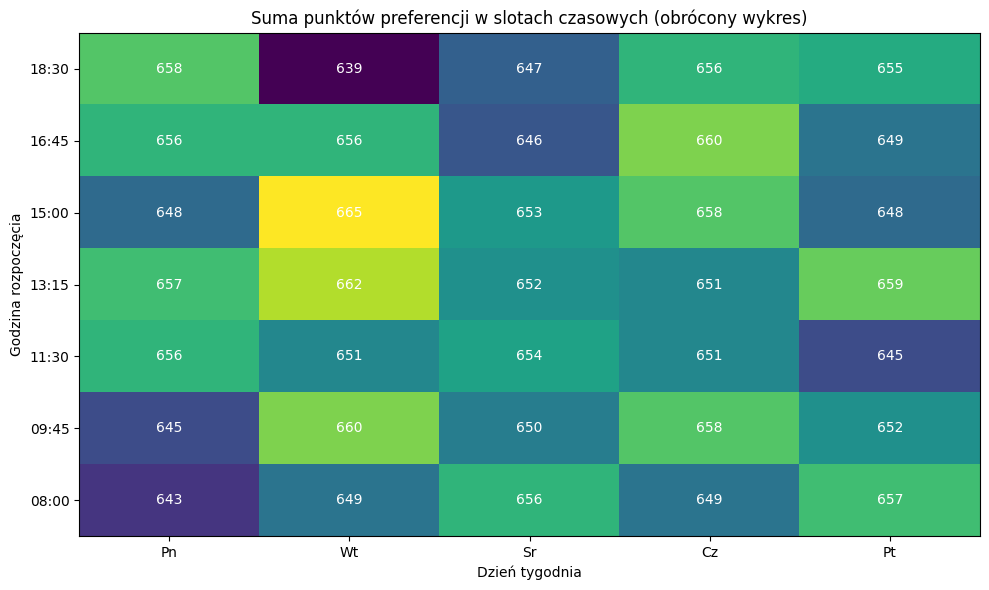

In [6]:
prefs = generate_preferences(plan, assign)
plot_prefrences(plan_2, prefs)

preference
5        1
6        6
7       91
8      348
9      740
10    2314
Name: count, dtype: int64


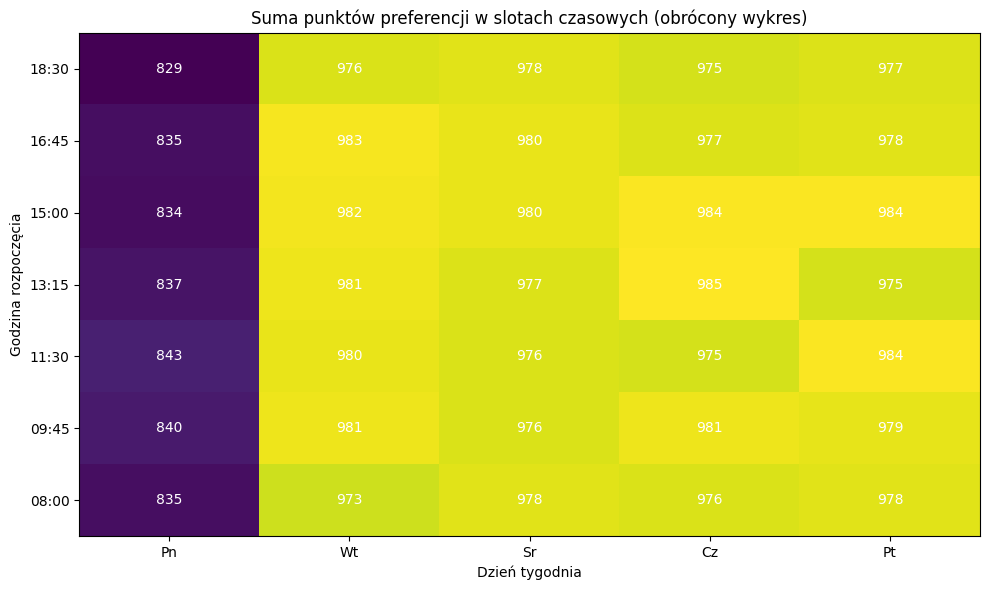

In [7]:
WEIGHTS = {
    'day': { 
        'Pn': 0.1, 'Wt': 1.0, 'Sr': 1.0, 'Cz': 1.0, 'Pt': 1.0
    },

    'hour': {
        '08:00': 1.0, '09:45': 1.0, '11:30': 1.0, '13:15': 1.0, '15:00': 1.0, '16:45': 1.0, '18:30': 1.0
    },

    'teacher': {
        'Prowadzący‑1': 0.6,
        'Prowadzący‑2': 0.6,
    }
}
prefs = generate_preferences(plan, assign, weights=WEIGHTS)
counts = prefs['preference'].value_counts(dropna=False).sort_index()
print(counts)
plot_prefrences(plan_2, prefs)

preference
0      584
1      131
2      160
3      198
4      207
5      196
6      202
7      213
8      203
9      185
10    1221
Name: count, dtype: int64


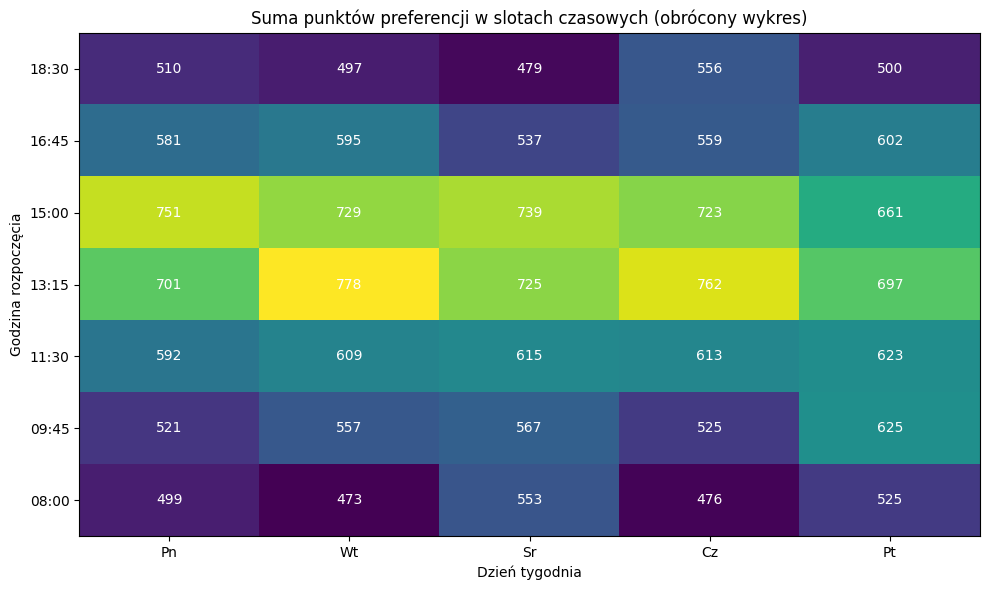

In [8]:
WEIGHTS = {
    'day': { 
        'Pn': 1.0, 'Wt': 1.0, 'Sr': 1.0, 'Cz': 1.0, 'Pt': 1.0
    },

    'hour': {
        '08:00': 0.1, '09:45': 0.3, '11:30': 0.5, '13:15': 1.0, '15:00': 1.0, '16:45': 0.4, '18:30': 0.1
    },

    'teacher': {
        'Prowadzący‑1': 0.6,
        'Prowadzący‑2': 0.6,
    }
}
prefs = generate_preferences(plan, assign, noise_sigma=0.5, weights=WEIGHTS)
counts = prefs['preference'].value_counts(dropna=False).sort_index()
print(counts)
plot_prefrences(plan_2, prefs)

preference
0      613
1      125
2      163
3      168
4      196
5      205
6      191
7      181
8      195
9      211
10    1252
Name: count, dtype: int64


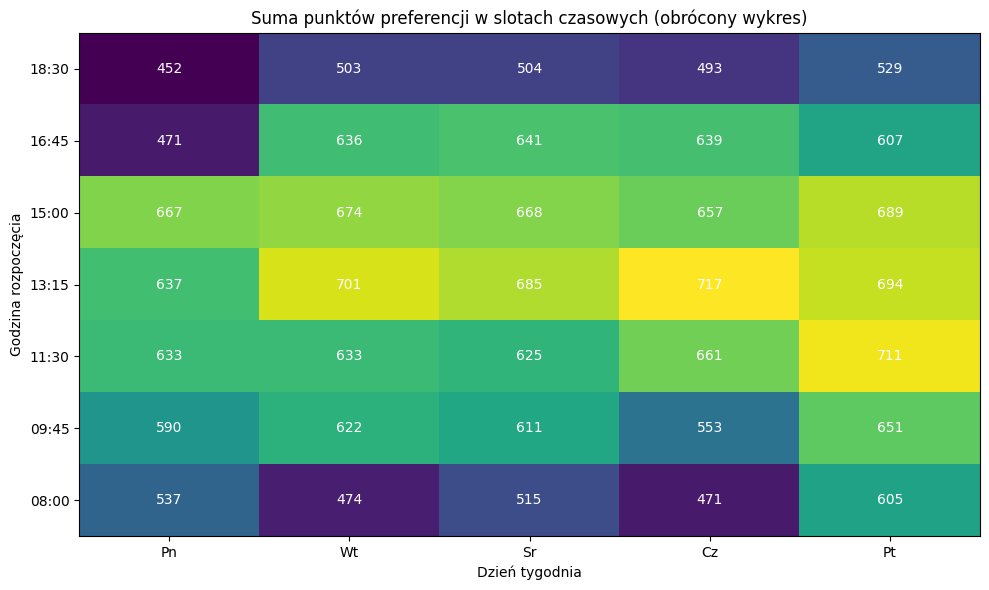

In [16]:
WEIGHTS = {
    'day': { 
        'Pn': 0.5, 'Wt': 0.8, 'Sr': 0.9, 'Cz': 0.6, 'Pt': 0.4
    },

    'hour': {
        '08:00': 0.1, '09:45': 0.5, '11:30': 0.6, '13:15': 0.9, '15:00': 0.8, '16:45': 0.4, '18:30': 0.1
    },

    'teacher': {
        'Prowadzący-18': 0.9,
        'Prowadzący-17': 0.9,
    }
}
prefs = generate_preferences(plan, assign, noise_sigma=0.5, weights=WEIGHTS)
counts = prefs['preference'].value_counts(dropna=False).sort_index()
print(counts)
plot_prefrences(plan_2, prefs)

preference
4     350
6    2800
8     350
Name: count, dtype: int64


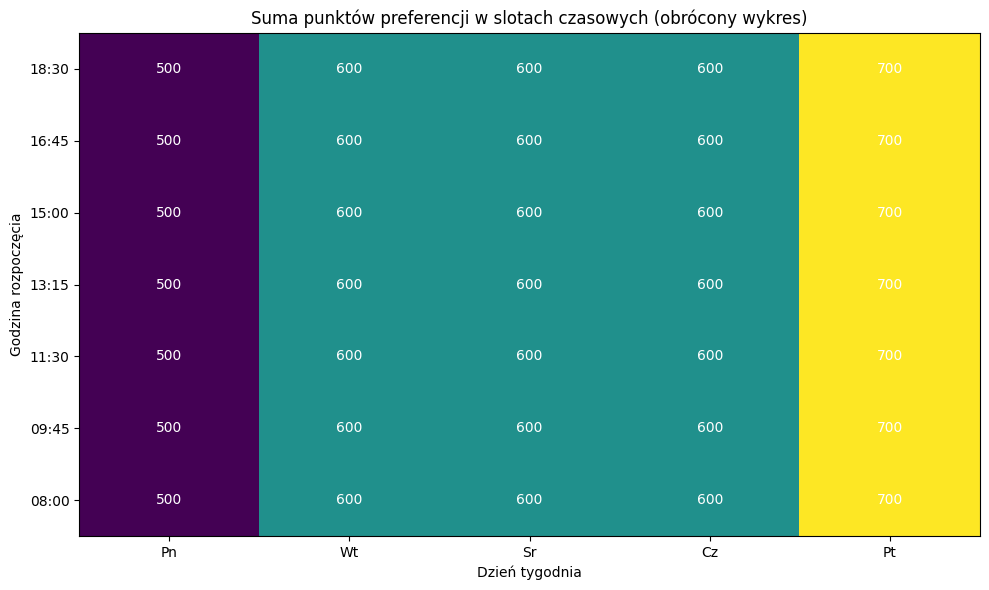

In [13]:
WEIGHTS = {
    'day': { 
        'Pn': 0.5, 'Wt': 0.5, 'Sr': 0.5, 'Cz': 0.5, 'Pt': 0.5
    },

    'hour': {
        '08:00': 0.5, '09:45': 0.5, '11:30': 0.5, '13:15': 0.5, '15:00': 0.5, '16:45': 0.5, '18:30': 0.5
    },

    'teacher': {
        'Prowadzący-1': 0.1,
        'Prowadzący-18': 1.0,
    }
}
prefs = generate_preferences(plan, assign, noise_sigma=0.0, weights=WEIGHTS)
counts = prefs['preference'].value_counts(dropna=False).sort_index()
print(counts)
plot_prefrences(plan_2, prefs)